<h1>ICS733: Ayudantía N°1</h1>

<h2><span style="color:chocolate">Economia 1</span></h2>

<p>Ayudante: Diego Bernal</p>


<ul>
<li>Comenten su codigo</li>
<li>Cada grafico debe llevar su titulo, etiquetas en cada axis y si es necesario una leyenda. Cada grafico s debe entender por si solo.</li>
<li>Mantengan las cosas dentro de funciones</li>

</ul>

In [90]:
%%capture
!pip install numpy pandas matplotlib seaborn collections

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple

# Comenté

1. Se acerca el black friday y la empresa JetSmart decide lanzar una promoción la cual reduce el precio de sus pasajes para aumentar sus ventas, pero sus ingresos disminuyen.

    - **Correcto**, si Jetsmart decide disminuir los precios y sus ingresos disminuyen implica que la demanda es inelastica. lo que se traduce en que un aumento en la cantidad vendida no cubre la bajada del precio(Cheers to the marketing department) 
2. El ministro de economía decide imponer un precio máximo al arriendo en la comuna de San Joaquín para ayudar a las familias.

    - **Depende**, los precios maximos pueden causar escasez. Si el arriendo maximo esta por debajo del precio de equilibrio, habra mas personas buscando arriendo que viviendas disponibles.Aunque el objetivo es ayudar a las familias, el efecto puede ser contraproducente generando un deterioro en el mercado del arriendo.

3. Un aumento al impuesto al libro busca recaudar mas dinero sin afectar demasiado al consumo.Comente


    - **Depende**, esta pregunta apunta a la elasticidad precio de la demanda de los libros, supongamos que es elastica, lo que provocaria que el consumo baje y la recaudacionfiscal tambien lo haria.

4. El gobierno decide invertir fuertemente en educación y desarrollo tecnológico para impulsar el crecimiento económico del país.

    - **Correcto**, Si se decide invertir en capital humano y desarrollo tecnológico aumenta la capacidad productiva del país en el largo plazo.

5. La economía de libre mercado indica que el gobierno es el único capaz de controlar la actividad económica para así promover el bienestar económico del país.

    - **No es correcto**, La economía de mercado se compone de decisiones descentralizadas, de los hogares yempresas que interactúan en el mercado, mediante las cuales se define la asignación de recursos resolviendo las preguntas qué, cómo y cuánto producir

6.  Chile el porcentaje de mujeres y jóvenes que trabajan respecto de los que pueden y están en edad de hacerlo es muy bajo en relación con otros países. Un analista económico comenta “Si incentivamos el trabajo de esta población sería una gran oportunidad para desplazar la Frontera de Posibilidades de Producción”.

    - **No es correcto**. No se está ocupando toda la capacidad productiva del país dado que no estántrabajando todos los que pueden, hacer que más mujeres y jóvenes trabajen implica un uso máseficiente de los recursos lo cual significa un paso desde un punto interior de la FPP hacia el borde, no un desplazamiento de la curva.

<p align="center">
  <img src="./imgs/marketing-team.jpg" alt="img">
</p>


# Introducción

Vamos con lo mas sencillo La **oferta** y la **demanda** en equilibrio las podemos escribir como funciones lineals de tal forma que:

$$
Q^d = 200 - x
$$

$$
Q^o = 2x + 50
$$

Podeos calcular el equilibrio del mercado, estimar la elasticidad de los precios cuando alguno aumenta o disminuye, o que ocurre cuando se mueven los precios por encima o debajo del equilibrio calcular las perdidas o ganancias dependiendo en que bando uno esta jaja.



Entonces al ser tan intuitivo hagamos funciones que calculen esto resultando en plots distintos.

In [92]:
def generate_random_values(size):
    np.random.seed(707)
    X = np.random.uniform(low=0,high=size,size=size)
    Q_d = 200 - X 
    Q_o = 2*X + 50 
    sorted_idx = np.argsort(X)
    X = X[sorted_idx]
    Q_d = Q_d[sorted_idx]
    Q_o = Q_o[sorted_idx]
    return X,Q_d,Q_o

In [93]:
X,Q_d,Q_o=generate_random_values(100)

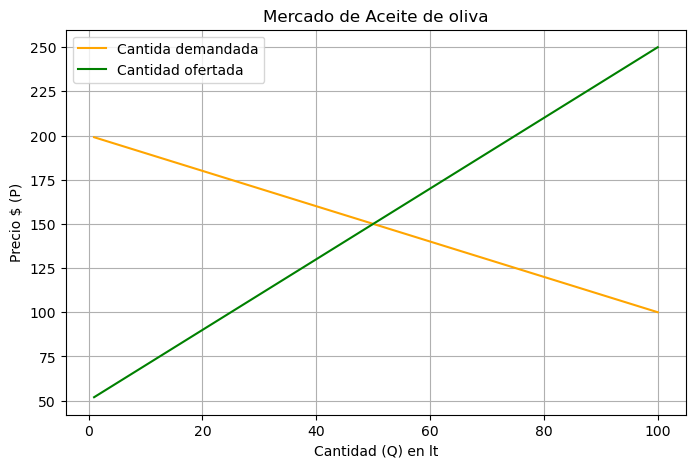

In [94]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(X,Q_d,linestyle='-',label="Cantida demandada",color = 'orange')
ax.plot(X,Q_o,linestyle='-',label='Cantidad ofertada',color='green')

ax.set_title('Mercado de Aceite de oliva')
ax.set_xlabel('Cantidad (Q) en lt'); ax.set_ylabel('Precio $ (P)')
ax.grid(True)
ax.legend()
plt.show()

1. Genere una función que calcule el punto de equilibrio usando Numpy con la función **linalg.solve**, debe despejar $Q^d = Q^o$

In [95]:
def pto_equilibrio():
    a = np.array([[-3]])
    b = np.array([[-150]])

    x = np.linalg.solve(a,b)

    p_e = x[0][0]
    q_e = 200 -p_e

    return p_e,q_e

In [96]:
p_e, q_e = pto_equilibrio()

C:\Users\Diego\AppData\Local\Temp\ipykernel_25064\3138486818.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(p_e, q_e, 'ko', label='Punto de equilibrio',color = "black")


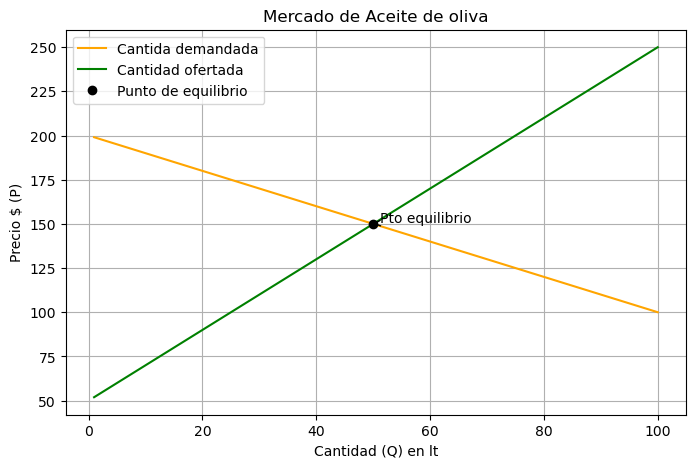

In [97]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(X,Q_d,linestyle='-',label="Cantida demandada",color = 'orange')
ax.plot(X,Q_o,linestyle='-',label='Cantidad ofertada',color='green')
ax.plot(p_e, q_e, 'ko', label='Punto de equilibrio',color = "black")
ax.annotate('Pto equilibrio', xy=(p_e, q_e), xytext=(p_e + 1.2, q_e + 1),
             arrowprops=dict(arrowstyle='->'))
ax.set_title('Mercado de Aceite de oliva')
ax.set_xlabel('Cantidad (Q) en lt'); ax.set_ylabel('Precio $ (P)')
ax.grid(True)
ax.legend()
plt.show()

Calcule la elasticidad del precio de la demanda utilizando esta formula:

$$
\left| \frac{\Delta\% Q}{\Delta\% P} \right| = 
\left| \frac{\frac{Q_2 - Q_1}{Q_1}}{\frac{P_2 - P_1}{P_1}} \right|
$$

In [98]:
def elast_precio(X,Q_d):
    if X is None or Q_d is None:
        return "No hay valores"
    else:
        try:
            P1, P2 = X[0],X[-1]
            print(f"{P1} and {P2}")
            Q1,Q2 = Q_d[0],Q_d[-1]
            print(f"{Q1} and {Q2}")

            elasticidad = abs(((Q2-Q1)/Q1) / ((P2-P1)/P1))
            
            if elasticidad > 1:
                msg = "La demanda es elastica"
            elif elasticidad < 1:
                msg = "La demanda es inelastica"
            else:
                msg = "La demanda tiene elasticidad unitara"
            return f"Como {round(elasticidad,4)} -> {msg}."

        except Exception as e:
            return f"Error, revisa tus datillos jeje {e}"


In [99]:
elast_precio(X,Q_d)

0.9663130790514063 and 99.97598334672408
199.03368692094858 and 100.02401665327592


'Como 0.0049 -> La demanda es inelastica.'

In [100]:
#Edite la funcion para que no dependa de tantos argumentos!
def excedentes(X,Q_d,Q_o,p_e,q_e):
    
    p_max = 200
    p_min = -25

    ec = 0.5 * q_e * (p_max - p_e)
    ep = 0.5 * q_e * (p_e - p_min)
    et = ec + ep

    return ec, ep, et

In [101]:
ec, ep, et = excedentes(X, Q_d, Q_o, p_e, q_e)

print(f"Excedente del consumidor: {ec}")
print(f"Excedente del productor: {ep}")
print(f"Excedente total: {et}")

Excedente del consumidor: 11250.0
Excedente del productor: 5625.0
Excedente total: 16875.0


In [102]:
min(X)

0.9663130790514063

C:\Users\Diego\AppData\Local\Temp\ipykernel_25064\1657652910.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(p_e, q_e, 'ko', label='Punto de equilibrio',color = "black")


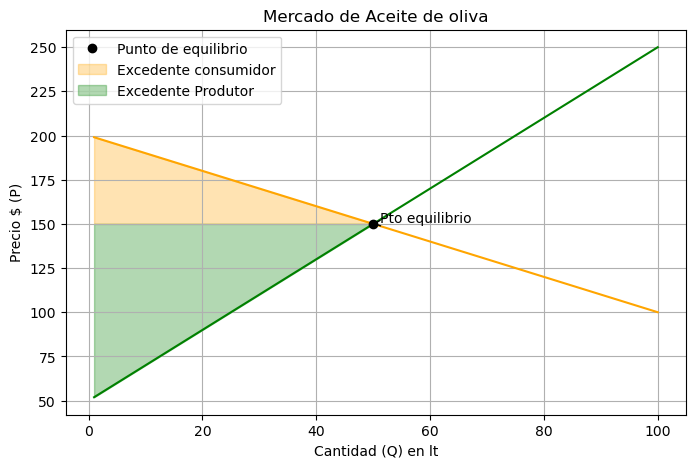

In [103]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(X,Q_d,linestyle='-',color = 'orange')
ax.plot(X,Q_o,linestyle='-',color='green')
ax.plot(p_e, q_e, 'ko', label='Punto de equilibrio',color = "black")
ax.annotate('Pto equilibrio', xy=(p_e, q_e), xytext=(p_e + 1.2, q_e + 1),
             arrowprops=dict(arrowstyle='->'))

ax.fill_between(X[X <= p_e],
                q_e,
                Q_d[X <= p_e],
                color='orange',
                alpha=0.3,
                label='Excedente consumidor')

ax.fill_between(X[X <= p_e],
                q_e,
                Q_o[X <= p_e],
                color='green',
                alpha=0.3,
                label='Excedente Produtor')

ax.set_title('Mercado de Aceite de oliva')
ax.set_xlabel('Cantidad (Q) en lt'); ax.set_ylabel('Precio $ (P)')
ax.grid(True)
ax.legend()
plt.show()

## Enunciado 2

# Introducción

Vamos con lo mas sencillo La **oferta** y la **demanda** en equilibrio las podemos escribir como funciones lineals de tal forma que:

$$
Q^d = \frac{170}{3} - \frac{p}{3}
$$

$$
Q^o = \frac{p}{2} - 10
$$



Based in the code of reference: <a href="https://intro.quantecon.org/intro_supply_demand.html">Quantitative Economics</a>

In [104]:
#First we hve to define the marjket in wich we are going to work 

market_churros = namedtuple('Market',['d_0', #demand intercept
                                      'd_1', #demand slope
                                      's_0', #supply intercept
                                      's_1' #supply slope

])

In [105]:
def create_market(d_0=170, d_1=3, s_0=20, s_1=2):
    return market_churros(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

In [106]:
def inverse_demand(p, model):
    return model.d_0 - model.d_1 * p

def inverse_supply(p, model):
    return model.s_1 * p + model.s_0

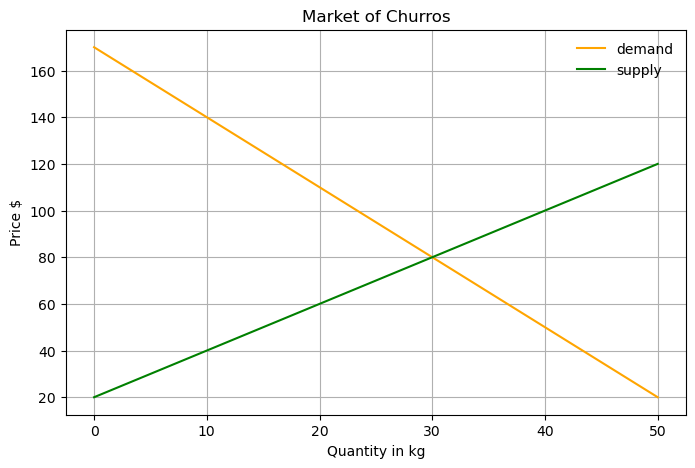

In [107]:
market = create_market()

grid_min, grid_max, grid_size = 0, 50, 200
p_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = inverse_supply(p_grid, market)
demand_curve = inverse_demand(p_grid, market)

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(p_grid, demand_curve, label='demand', color='orange')
ax.plot(p_grid, supply_curve, label='supply', color='green')
ax.legend(loc='upper right', frameon=False)
ax.set_title('Market of Churros')
ax.set_xlabel('Quantity in kg');ax.set_ylabel('Price $')
ax.grid(True)
plt.show()

In [108]:
def pto_equilibrio():
    #Solve equation of Q_d = Q_o
    a = np.array([[2.5]])
    b = np.array([[200]])

    x = np.linalg.solve(a,b)
    
    p_e = x[0][0]
    q_e = 170/3 - p_e/3
    return round(p_e),round(q_e)

In [109]:
p_e,q_e = pto_equilibrio()

In [110]:
print(f'Equilibrium price: {p_e} \nEquilibrium Quantity: {q_e}')

Equilibrium price: 80 
Equilibrium Quantity: 30


In [128]:
q_grid = np.arange(0, 30)
q_grid
p_grid_ = np.full(fill_value=80,shape=q_grid.shape)

In [136]:
q_grid_p_min = np.arange(0,50)
p_min_precios = np.full(fill_value=100,shape=q_grid_p_min.shape)

C:\Users\Diego\AppData\Local\Temp\ipykernel_25064\1407536896.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(q_e, p_e, 'ko', label='Competitive equilibrium',color = "black")


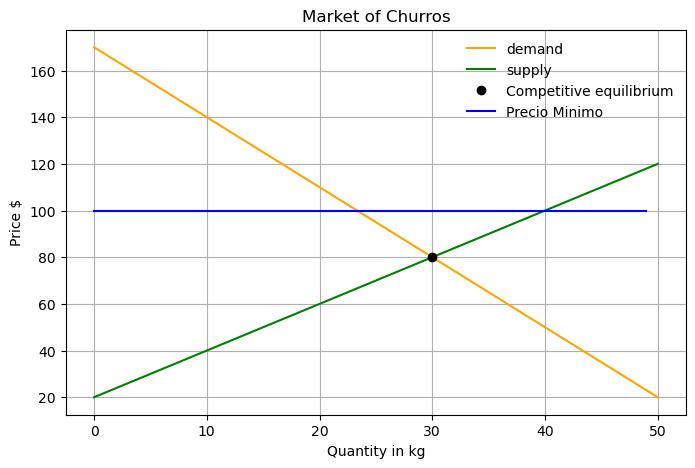

In [139]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(p_grid, demand_curve, label='demand', color='orange')
ax.plot(p_grid, supply_curve, label='supply', color='green')
ax.plot(q_e, p_e, 'ko', label='Competitive equilibrium',color = "black")
#ax.plot(q_grid,p_grid_,label='Equilibrium Price', color = 'red')
ax.plot(q_grid_p_min,p_min_precios,label='Precio Minimo',color = 'blue')
ax.annotate('Pto equilibrio', xy=(p_e, q_e), xytext=(p_e + 1.2, q_e + 1),
             arrowprops=dict(arrowstyle='->'))
ax.legend(loc='upper right', frameon=False)
ax.set_title('Market of Churros')
ax.set_xlabel('Quantity in kg');ax.set_ylabel('Price $')
ax.grid(True)
plt.show()

In [131]:
inverse_supply(23.3, market)

66.6

In [132]:
demand_curve.max()

170.0

In [133]:
def excedentes(demand_curve,supply_curve,p_e,q_e):
    
    p_max = demand_curve.max()
    p_min = supply_curve.min()

    ec = 0.5 * q_e * (p_max - p_e)
    ep = 0.5 * q_e * (p_e - p_min)
    et = ec + ep

    return ec, ep, et

In [134]:
ec, ep, et = excedentes(demand_curve,supply_curve,p_e,q_e)
print(f"Excedente del consumidor: {round(ec)}$")
print(f"Excedente del productor: {round(ep)}$")
print(f"Excedente total: {round(et)}$")

Excedente del consumidor: 1350$
Excedente del productor: 900$
Excedente total: 2250$


Imposición de $P = 100$ cuando esto pasa se **provoca** un **exceso de oferta!**, se debe determinar la cantidad ofrecida y demandada reemplazando el precio minimo $P=100$, en ambas curvas.

$$

Q_{d} = \frac{170}{3} - \frac{100}{3} \rightarrow 23,3
$$


$$
Q_{O} = \frac{100}{2} - 10 \rightarrow 40
$$

El **exceso de oferta** se obtiene restando $Q_{d} - Q_{d} = 40 - 23 \rightarrow 16,7$

In [140]:
def inverse_demand_(p, model):
    return (model.d_0 - p)/3

In [141]:
inverse_demand_(100,market)

23.333333333333332

In [143]:
##Modofique para encontrar los nuevos valores
def excedentes(demand_curve,supply_curve,pmin,q_e,p_e): #pmin = 100
    
    p_max = demand_curve.max()
    p_min = supply_curve.min()
    q_n = inverse_demand_(100,market) #Precio min 100
    p_e_s = inverse_supply(q_n, market) #Precio del oferente cuando el demandante consume 23 a un precio minimo de 100
    p_e_d = pmin #100

    ec = 0.5 * q_n * (p_max - p_e_d)
    ep = q_n*(p_e_d - p_e_s) + 0.5 * q_n * (p_e_s - p_min)
    et = ec + ep
    pie = 0.5*((q_e-q_n)*(p_e-p_e_s)) + 0.5*((q_e-q_n)*(pmin-p_e))

    return ec, ep, et, pie

In [144]:
ec, ep, et, pie = excedentes(demand_curve,supply_curve,100,q_e,p_e)

In [145]:
print(f"Excedente del consumidor: {round(ec)}$")
print(f"Excedente del productor: {round(ep)}$")
print(f"Perdida de eficiencia: {round(pie)}$")

Excedente del consumidor: 817$
Excedente del productor: 1322$
Perdida de eficiencia: 111$


In [146]:
q_e_pmin = round(inverse_demand_(100,market))
mask = (p_grid >= q_e_pmin) & (p_grid <= q_e)

In [147]:
(q_e_pmin- demand_curve.min())

3.0

In [148]:
def point_center(demand_curve,supply_curve,p_e,q_e,pmin,q_e_pmin):
    x_center_demand = 10
    y_center_demand = (demand_curve.max() + pmin)/2 -5
    x_center_supply = 10
    y_center_supply = (pmin+supply_curve.min())/2
    x_center_pie = (q_e + q_e_pmin) /2
    y_center_pie = p_e
    return [(x_center_demand, y_center_demand),
            (x_center_supply, y_center_supply),
            (x_center_pie, y_center_pie)]

    

C:\Users\Diego\AppData\Local\Temp\ipykernel_25064\2879010531.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(q_e, p_e, 'ko', label='Competitive equilibrium',color = "black")


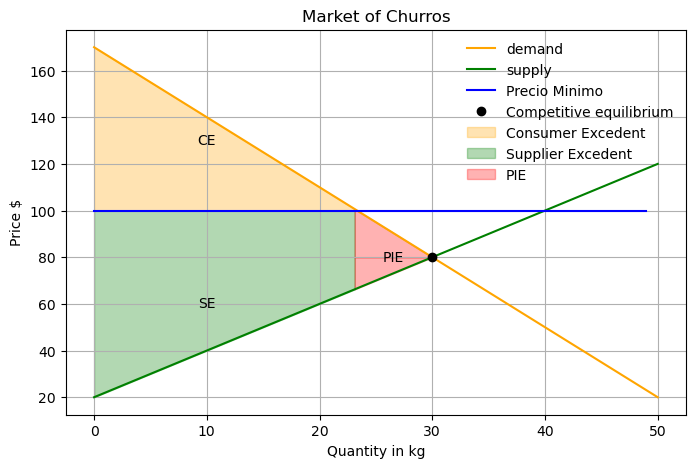

In [150]:
labels = ['CE','SE','PIE']
points = point_center(demand_curve, supply_curve, p_e, q_e, pmin=100, q_e_pmin=23)


fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(p_grid, demand_curve, label='demand', color='orange')
ax.plot(p_grid, supply_curve, label='supply', color='green')
ax.plot(q_grid_p_min,p_min_precios,label='Precio Minimo',color = 'blue')
ax.plot(q_e, p_e, 'ko', label='Competitive equilibrium',color = "black")

ax.fill_between(p_grid[p_grid <= inverse_demand_(100,market)],
                100,
                demand_curve[p_grid <= inverse_demand_(100,market)],
                color='orange',
                alpha=0.3,
                label='Consumer Excedent')

ax.fill_between(p_grid[p_grid <= inverse_demand_(100,market)],
                100,
                supply_curve[p_grid <= inverse_demand_(100,market)],
                color='green',
                alpha=0.3,
                label='Supplier Excedent')

ax.fill_between(p_grid[mask],
                p_e,
                demand_curve[mask],
                color = 'red',
                alpha = 0.3,
                label = 'PIE')


ax.fill_between(p_grid[mask],
                p_e,
                supply_curve[mask],
                color='red',
                alpha=0.3)
for (q,p),label in zip(points,labels):
    ax.text(q,p,label,ha='center',va='center',fontsize=10,color='black')

ax.legend(loc='upper right', frameon=False)
ax.set_title('Market of Churros')
ax.set_xlabel('Quantity in kg');ax.set_ylabel('Price $')
ax.grid(True)
plt.show()

In [151]:
uvas = [0,10,20,30,40,50,60]
aceitunas = [200,195,185,180,125,80,0]

C:\Users\Diego\AppData\Local\Temp\ipykernel_25064\3578546876.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(uvas,aceitunas,'ko',color = 'black')


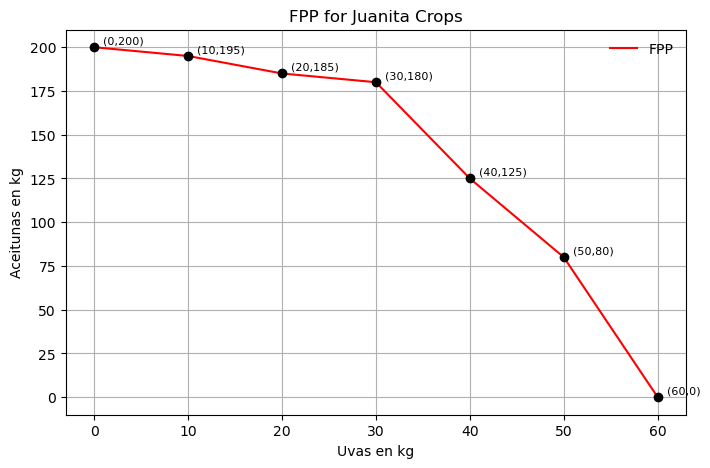

In [152]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(uvas,aceitunas,label = 'FPP',color = 'red')
ax.plot(uvas,aceitunas,'ko',color = 'black')


for (u,a) in  zip(uvas,aceitunas):
    ax.text(u+1,a+2,f'({u},{a})',fontsize=8)

ax.legend(loc= 'upper right',frameon = False)
ax.set_title('FPP for Juanita Crops')
ax.set_xlabel('Uvas en kg'); ax.set_ylabel('Aceitunas en kg')
ax.grid(True)
plt.show()

<p>Depende del tramo, ya que al no ser constante la linea de producción no podemos calcular una pendiente para ver el trade-off entre producir mas uvas o aceitunas, por lo que si nos posicionamos en el punto en el que se producen 10 uvas y 195 aceitunas, veamos que pasa si aumentamos la pproducción de uvas.</p>

Pasar de 20 a 30 kg de Uvas
$$
Uvas: 30 - 20 = 10 \space \\
Aceitunas: 180 - 185 = -5
$$

$$
\frac{-5}{10} = -0.5 \space \text{kg de aceitunas por cada kg de uva}
$$

Las medidas que se pueden tomar para desplazar la curva de FPP a la derecha son.

- Innovación tecnologica 
- Aumento de recursos (insumos o trabajadores)

Y decidir a que item le asignamos el aumento con ello la curva se movera de distintas maneras:

<p align="center">
  <img src="./imgs/imgs_fpp.png" alt="img">
</p>

- Los puntos dentro de la curva son prte de la solución pero son **ineficientes**.
- Los puntos fuera de la curva no entran en el dominio debido a las restricciones de recursos.
- Los puntos en la curva son posibles y eficientes.